# TABLE OF CONTENTS

1. [Introduction](#introduction)  
2. [Scenario](#scenario)  
3. [Ask](#ask)  
4. [Prepare](#prepare)  
5. [Process](#process)  
6. [Analyze](#analyze)  
7. [Share](#share)  
8. [Act](#act) 

<a id="introduction"></a>
# INTRODUCTION
This is a project for Google Data Analytics Capstone – Case Study 1(Cyclistic bike-share analysis).

<a id="scenario"></a>
# SCENARIO
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations. The license is available [here](https://www.divvybikes.com/data-license-agreement).

<a id="ask"></a>
# ASK
####  Guiding questions
*  **What is the problem you are trying to solve?** *The problem we are trying to solve is the conversion of casual riders to annual members.*  

*  **How can your insights drive business decisions?** *The insights will help the marketing team to increase more annual members.*

####  Key tasks
*  Identify the business task  

*  Consider key stakeholders  

####  Deliverable
*  A clear statement of the business task - *Understand how casual riders and annual members use Cyclistic differently and convert casual riders to memebers.*

<a id="prepare"></a>
# PREPARE
####  Guiding questions
*  **Where is your data located?** *The data is located in Google case study and kaggle.*

*  **How is the data organized?** *Data is organized in csv.*

*  **Are there issues with bias or credibility in this data? Does your data ROCCC?** *It’s the actual data of the company. Doesn’t have bias. Its credible. Its Reliable, Original, Comprehensive, Current and Cited.*

*  **How are you addressing licensing, privacy, security, and accessibility?** *The license is provided in the case study. The data doesn’t share personal details of the customers. Its secure since its company’s private data. Its accessible for the team.*

*  **How did you verify the data’s integrity?** *All data is in similar format and correct data type.*

*  **How does it help you answer your question?** *The data provides a good insight about the riders and members. We can derive useful insights out of it.*

*  **Are there any problems with the data?** *No. The data looks good.*

#### Key tasks
*  Download data and store it appropriately. 

*  Identify how it’s organized. 

*  Sort and filter the data. 

*  Determine the credibility of the data.

#### Deliverable
*  A description of all data sources used - *The data source provides 12 months of Cyclistic trip data.*

<a id="process"></a>
# PROCESS
####  Guiding questions
*  **What tools are you choosing?** *Spreadsheet and SQL.*

*  **Have you ensured your data’s integrity?** *Yes.*

*  **What steps have you taken to ensure that your data is clean?** *The data has the right data types and duplicates are removed.*

*  **How can you verify that your data is clean and ready to analyze?** *Verified that the data is Valid, Accurate, Complete, Consistent and Uniform.*

*  **Have you documented your cleaning process so you can review and share those results?** *Yes. The cleaning process is documented.*

#### Key tasks
*  Check the data for errors. 

*  Choose your tools. 

*  Transform the data so you can work with it effectively. 

*  Document the cleaning process.

#### Deliverable
*  Documentation of any cleaning or manipulation of data

<a id="analyze"></a>
# ANALYZE
####  Guiding questions
*  **How should you organize your data to perform analysis on it?** *Merged all the csv files using the command* `awk '(NR == 1) || (FNR > 1)' file*.csv > combined.csv`

*  **Has your data been properly formatted?** *Yes*

*  **What surprises did you discover in the data?** *I was unable to open the file because of the size. Opened in Big Query by creating a bucket in Gogole Storage. Timestamp was in a different format and had to fix it.*

*  **What trends or relationships did you find in the data?** *Data is analyzed by rideable type usage, yearly, monthly,weekly and daily.*

*  **How will these insights help answer your business questions?** *The data shows that the casual riders drive more than memebers. Their usage is high on particular days of the week and particular months. Creating special offers on those days and months will help increase more members.*

####  Key tasks
*  Aggregate your data so it’s useful and accessible. 

*  Organize and format your data. 

*  Perform calculations. 

*  Identify trends and relationships.

####  Deliverable
*  A summary of your analysis

#### Steps 

*  Merged all CSV files into one file using the command in a terminal.

```
awk '(NR == 1) || (FNR > 1)' file*.csv > combined.csv
```

*  The combined.csv was more than 100MB and was unable to open in Excel. So tried to upload in Big Query. Couldn’t upload in Big Query either because of the size. So created a Bucket in Google Storage and tried to upload the combined file. But the timestamp format in started_at and ended_at fields were different in some files. Some files used the format mm/dd/yy and others yyyy-mm-dd. So uploaded the file with started_at and ended_at fields as String. Then parsed the timestamp format in the query. 

*  The started_at and ended_at fields were Integer in few files and String in others. So created a table all_cyclistic_data including the timestamp Parsing and casting started_at and ended_at fields as String.
```
CREATE TABLE casestudycycylistic.CyclisticData.all_cyclistic_data AS
( SELECT 
    ride_id,
    rideable_type,
    parse_timestamp('%F %T', started_at) as started_at,
    parse_timestamp('%F %T', ended_at) as ended_at,
    start_station_name,
    CAST(start_station_id AS STRING) AS start_station_id,
    end_station_name,
    CAST(end_station_id AS STRING) AS end_station_id,
    member_casual
  FROM casestudycycylistic.CyclisticData.combined1 
  WHERE started_at not like '%/%' 
  
  UNION ALL 
  
  SELECT 
    ride_id,
    rideable_type,
    parse_timestamp('%m/%d/%y %R', started_at) as started_at,
    parse_timestamp('%m/%d/%y %R', ended_at) as ended_at,
    start_station_name,
    CAST(start_station_id AS STRING) AS start_station_id,
    end_station_name,
    CAST(end_station_id AS STRING) AS end_station_id,
    member_casual
  FROM casestudycycylistic.CyclisticData.combined1 
  WHERE started_at like '%/%'   
)
```

*  Created a backup data(Cyclistic.all_cyclistic_data_bkp) so that the original data is not messed up while processing.

```
CREATE TABLE casestudycycylistic.CyclisticData.all_cyclistic_data_bkp AS SELECT * FROM casestudycycylistic.CyclisticData.all_cyclistic_data;
```

*  Created a column ride_len (ride length).

```
ALTER TABLE casestudycycylistic.CyclisticData.all_cyclistic_data_bkp
ADD COLUMN ride_len Int64
```

*  Calculated the ride length for all the riders by subtracting the started_at and ended_at fields.

```
UPDATE casestudycycylistic.CyclisticData.all_cyclistic_data_bkp SET ride_len = timestamp_diff(ended_at, started_at, MINUTE) WHERE RIDE_LEN IS NULL;
```

*  Create  a column day_of_the_week.

```
ALTER TABLE casestudycycylistic.CyclisticData.all_cyclistic_data_bkp
ADD COLUMN day_of_the_week Int64
```

*  Calculate the day of the week.

```
UPDATE casestudycycylistic.CyclisticData.all_cyclistic_data_bkp SET day_of_the_week = EXTRACT(DAYOFWEEK FROM started_at) WHERE day_of_the_week IS NULL;
```

*  Query all the data to upload to Tableau. Select all the needed data using the query below :

```
select 
    ride_id, rideable_type,
    started_at, ended_at,
    ride_len,
    day_of_the_week,
    start_station_name, start_station_id, end_station_name, end_station_id, member_casual
from  casestudycycylistic.CyclisticData.all_cyclistic_data_bkp where ride_len >= 0;
```

*  Export the results as CSV. Since the results are greater than 100 MB, it needs to be exported to Google Drive. The file can be downloaded to local computer from Google Drive. 

*  Now upload the data to Tableau to create Visualization.

<a id="share"></a>
#  SHARE
####  Guiding questions
*  **Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?** *Yes. Casual riders use more than the members. Members use it to commute to work while Casual riders use it for leisure.*

*  **What story does your data tell?** *Data tells the difference in usage by riders.*
 
*  **How do your findings relate to your original question?** *Findings provide details about the usage by causal riders. We can create offers to make them members.*
 
*  **Who is your audience? What is the best way to communicate with them?** *Marketing team. Create a Presentation.*
 
*  **Can data visualization help you share your findings?** *Yes*
 
*  **Is your presentation accessible to your audience?** *Yes*

####  Key tasks
*  Determine the best way to share your findings.

*  Create effective data visualizations.

*  Present your findings.

*  Ensure your work is accessible.

####  Deliverable
*  Supporting visualizations and key findings

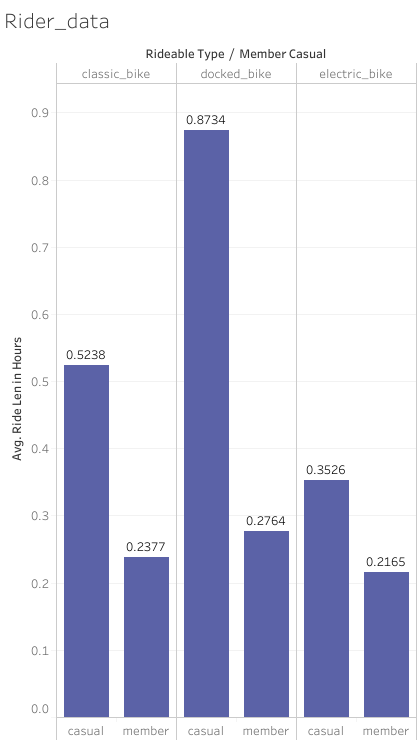

Rider_data shows that average ride length of Casual riders is high in every bike type compared to Members. Casual riders ride more than the Members.

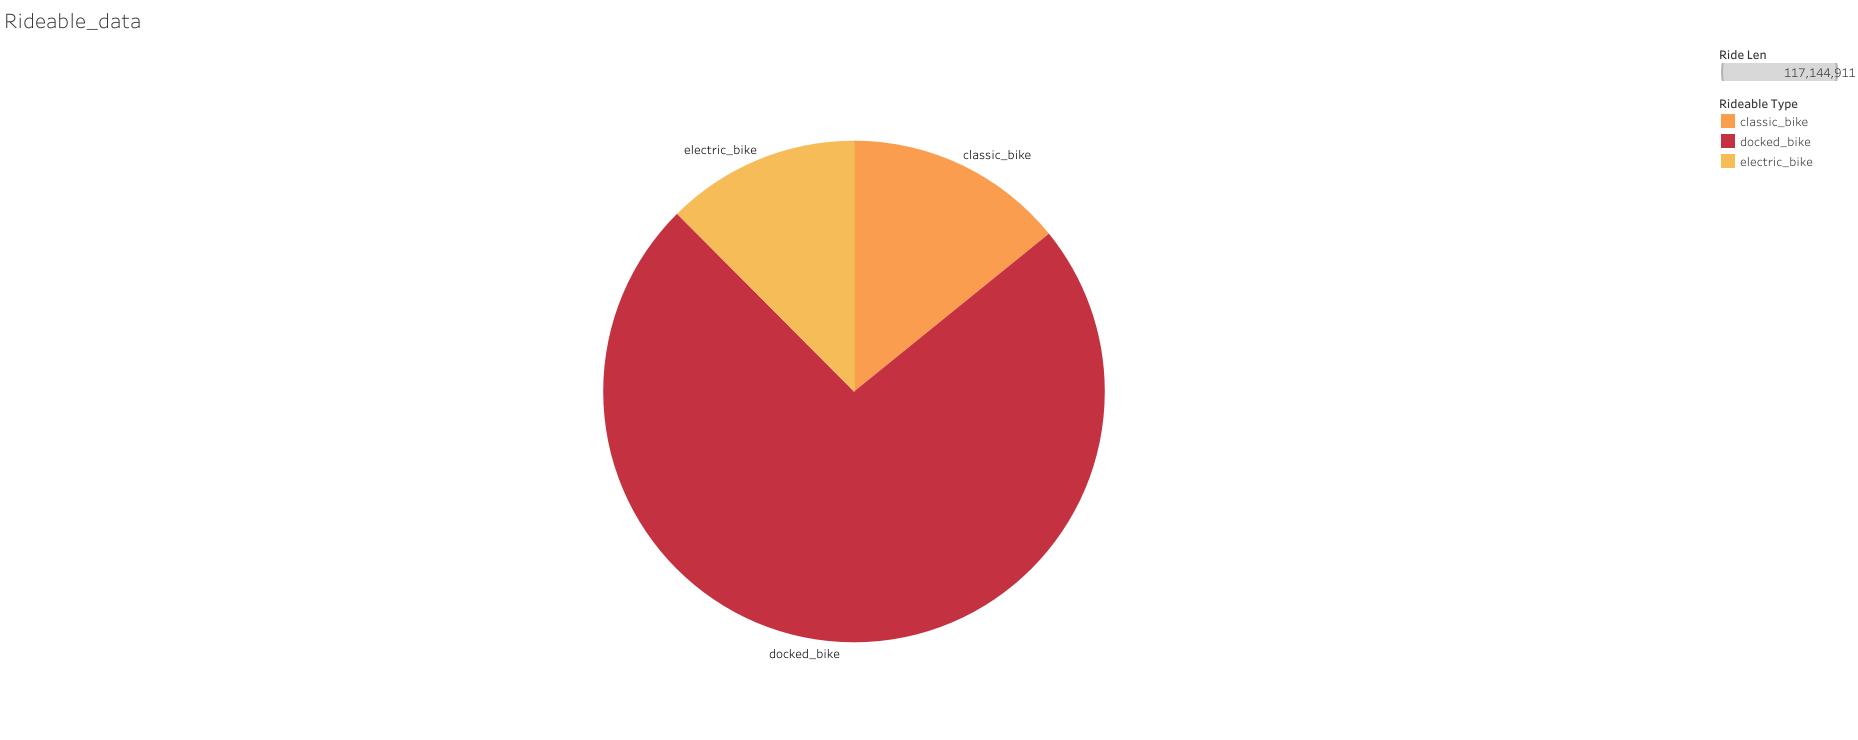

Rideable data shows that the ride length for 73% of riders prefer docked bike,14% prefer classic bike and 12% prefer electric bike.

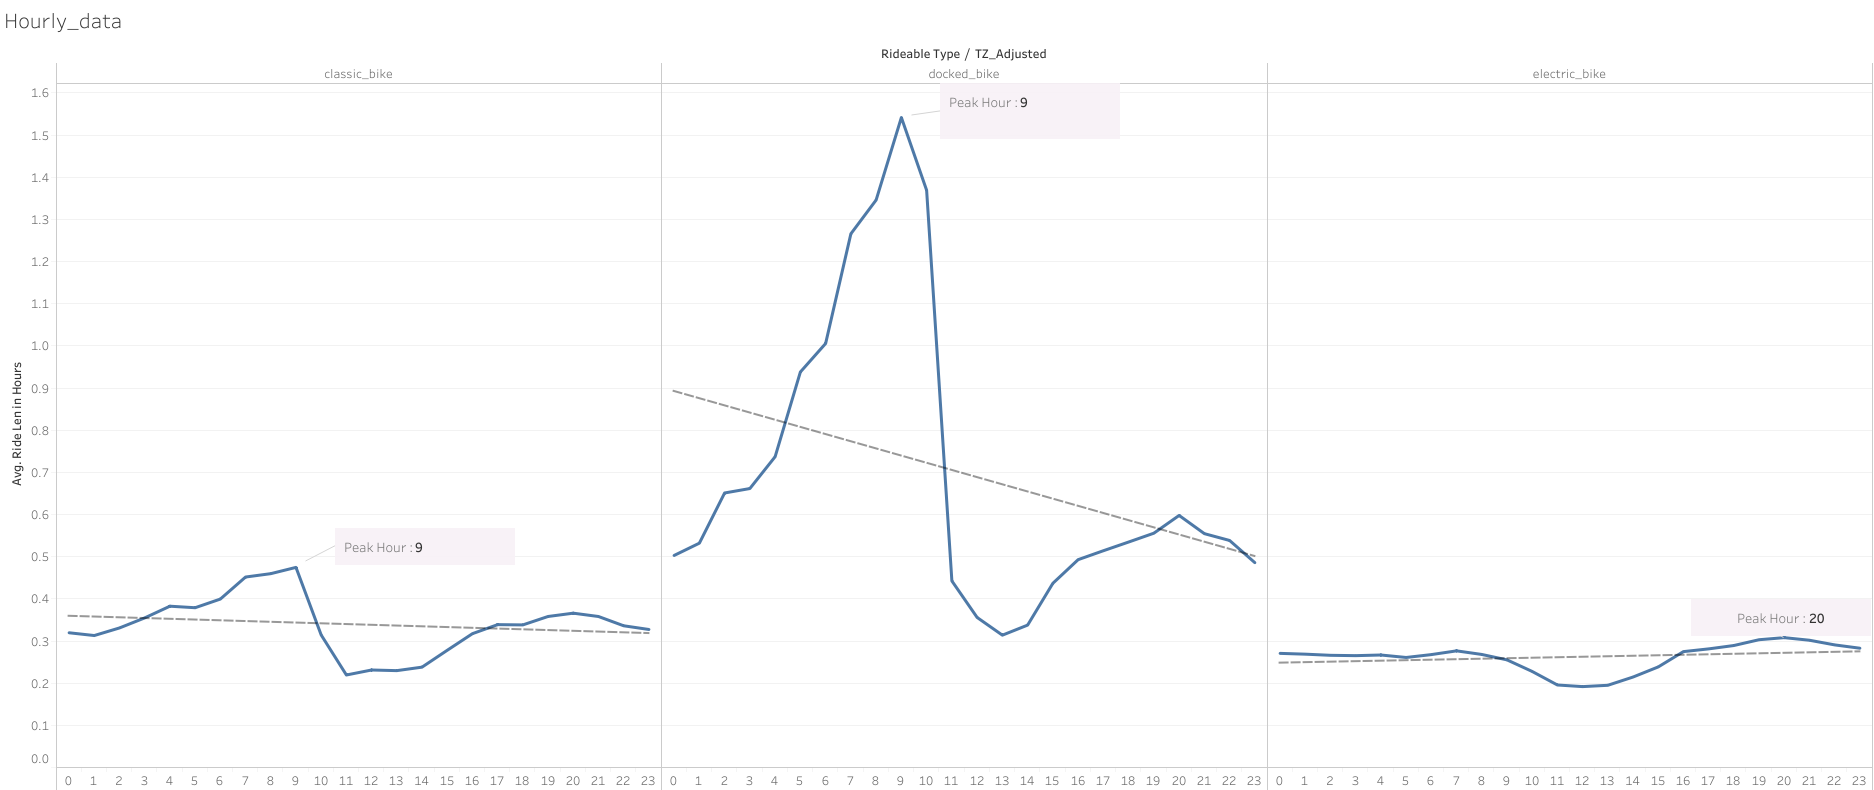

The hourly data shows that the peak usage in a day is around 9A.M to 10A.M.

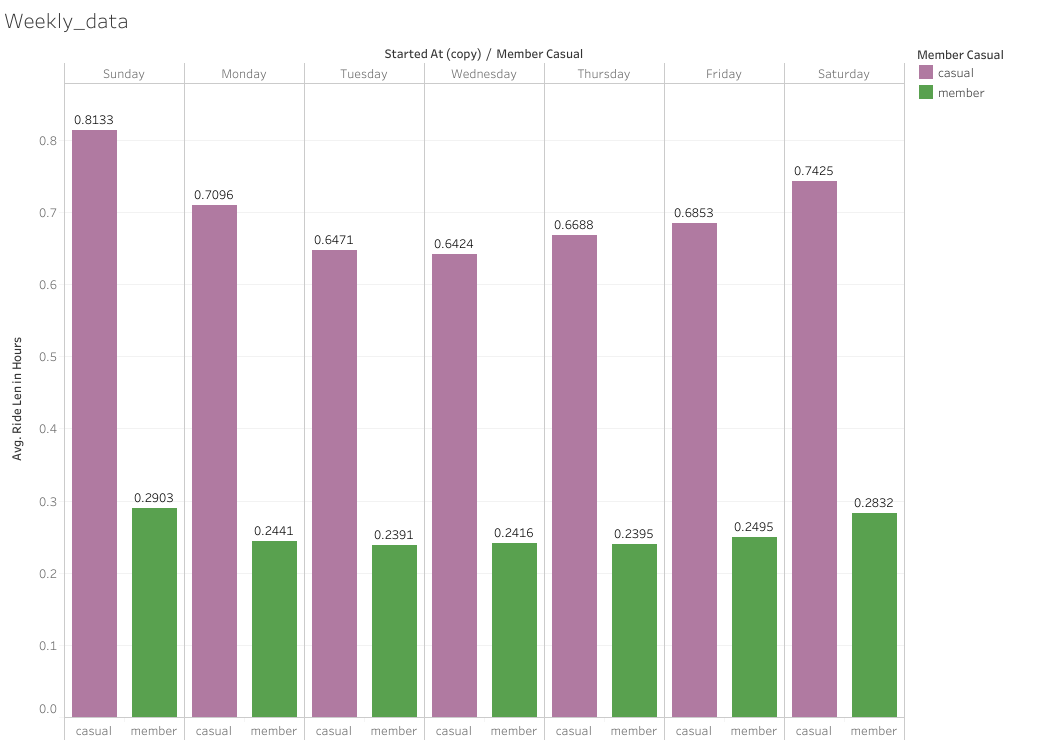

Casual riders use bikes more on Weekends and Memeber riders use consistenly throughout the week.

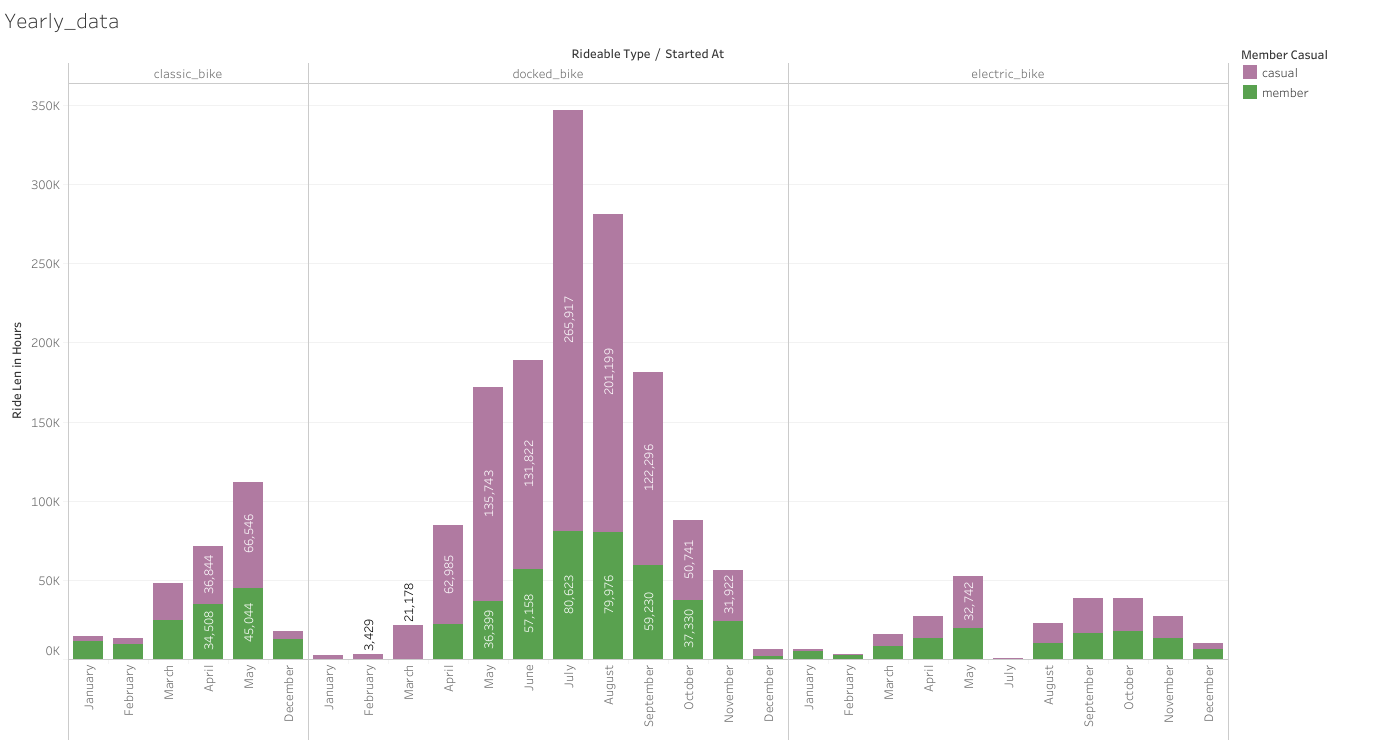

The peak usage of bikes is around summer, mostly May to July. The leaset usage is wround December to February. Maybe because of the Chicago weather.

<a id="act"></a>
#  ACT
####  Findings
*  80% of Casual riders use docked biked compared to the rest.

*  Usage of casual riders is twice that of the members.

*  Members mostly use the bikes to commute to work since the pattern of usage is more in weekdays and same throughout the year.


####  Recommendations
* The usage of casual riders are more on Weekends. So provide offers/promotions for weekends, so they will become members.

* Riders prefer Docked bike more than electric and classic bike. Increase more docking stations for the ease of user's comfort.

* The usage is more in July and August months. So start creating more offers during spring and summer months.

* The peak usage in a day is at 9 A.M, so increase the availability of docked bikes during that time.

Additional data of rider age, price of the bikes can give us more detailed view for further findings.